In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples,h,w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [4]:
n_components = 100

In [5]:
pca = PCA(n_components=n_components,
          svd_solver='randomized',
          whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

In [6]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)

In [8]:
print(clf.best_estimator_)

SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [9]:
y_pred = clf.predict(X_test_pca)

In [10]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.64      0.72        39
     Colin Powell       0.76      0.90      0.83       111
  Donald Rumsfeld       0.79      0.67      0.72        63
    George W Bush       0.85      0.91      0.88       276
Gerhard Schroeder       0.75      0.77      0.76        47
      Hugo Chavez       1.00      0.62      0.77        37
       Tony Blair       0.82      0.72      0.77        71

         accuracy                           0.82       644
        macro avg       0.83      0.75      0.78       644
     weighted avg       0.83      0.82      0.82       644

[[ 25   1   2   7   2   0   2]
 [  1 100   0   7   0   0   3]
 [  3   7  42  10   1   0   0]
 [  1  15   5 252   3   0   0]
 [  0   1   2   4  36   0   4]
 [  0   3   1   6   2  23   2]
 [  0   4   1  11   4   0  51]]


In [11]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=2):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)

In [12]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [13]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

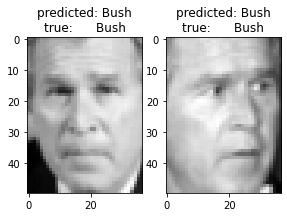

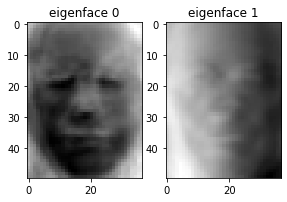

In [14]:
plot_gallery(X_test, prediction_titles, h, w)

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()